# Qiskit Tool

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(5, name='qubit')
c = ClassicalRegister(1, name='bit')
qc = QuantumCircuit(q,c)

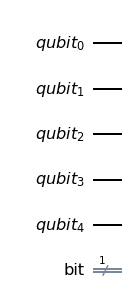

In [2]:
qc.draw('mpl')

In [3]:
for i in range (5):
    qc.x(q[i])
    qc.h(q[i])
qc.barrier()
for i in range (2):
    qc.y(q[i])
qc.barrier()
for i in range (2,5):
    qc.z(q[i])


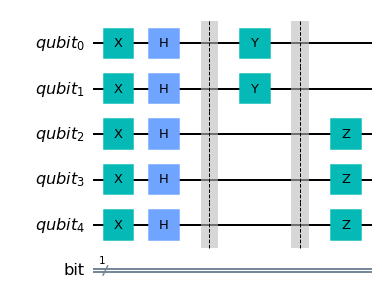

In [4]:
qc.draw('mpl')

In [5]:
qc.draw('text')

┌───┐┌───┐ ░ ┌───┐ ░      
qubit_0: ┤ X ├┤ H ├─░─┤ Y ├─░──────
         ├───┤├───┤ ░ ├───┤ ░      
qubit_1: ┤ X ├┤ H ├─░─┤ Y ├─░──────
         ├───┤├───┤ ░ └───┘ ░ ┌───┐
qubit_2: ┤ X ├┤ H ├─░───────░─┤ Z ├
         ├───┤├───┤ ░       ░ ├───┤
qubit_3: ┤ X ├┤ H ├─░───────░─┤ Z ├
         ├───┤├───┤ ░       ░ ├───┤
qubit_4: ┤ X ├┤ H ├─░───────░─┤ Z ├
         └───┘└───┘ ░       ░ └───┘
  bit: 1/══════════════════════════

In [6]:
print(qc.draw('latex_source')) # to present in latex

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{qubit}_{0} :  } & \lstick{{qubit}_{0} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} \barrier[0em]{4} & \qw & \gate{\mathrm{Y}} \barrier[0em]{4} & \qw & \qw & \qw & \qw\\
	 	\nghost{{qubit}_{1} :  } & \lstick{{qubit}_{1} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \gate{\mathrm{Y}} & \qw & \qw & \qw & \qw\\
	 	\nghost{{qubit}_{2} :  } & \lstick{{qubit}_{2} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \gate{\mathrm{Z}} & \qw & \qw\\
	 	\nghost{{qubit}_{3} :  } & \lstick{{qubit}_{3} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \gate{\mathrm{Z}} & \qw & \qw\\
	 	\nghost{{qubit}_{4} :  } & \lstick{{qubit}_{4} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \gate{\mathrm{Z}} & \qw & \qw\\
	 	\nghost{\mathrm{{bit} :  }} & \lstick{\mathrm{{bit} :  }} & \

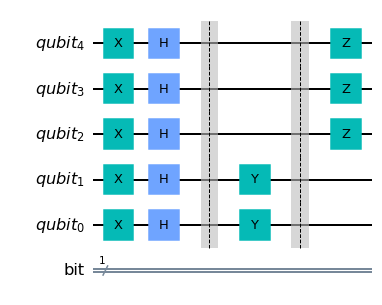

In [7]:
qc.draw('mpl', reverse_bits=True)

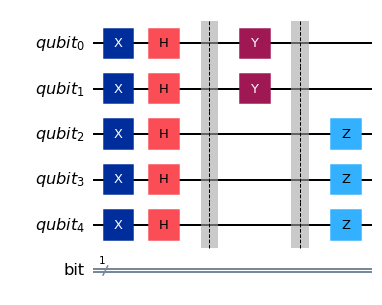

In [8]:
qc.draw('mpl', style= 'iqx')

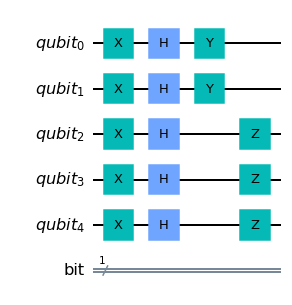

In [9]:
qc.draw('mpl', plot_barriers=False)

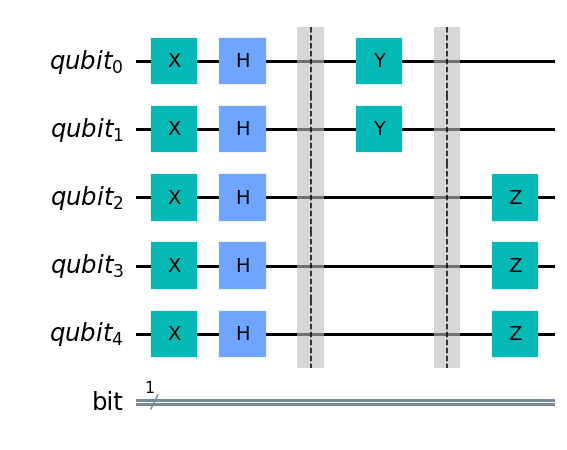

In [10]:
qc.draw('mpl',scale=1.5)

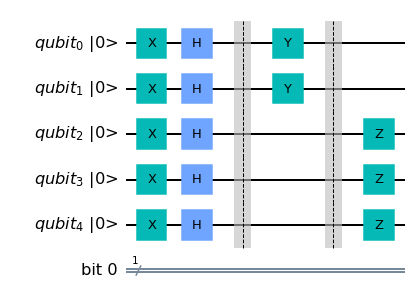

In [11]:
qc.draw('mpl',initial_state=True) # all in ground state

In [12]:
qc.measure_all()

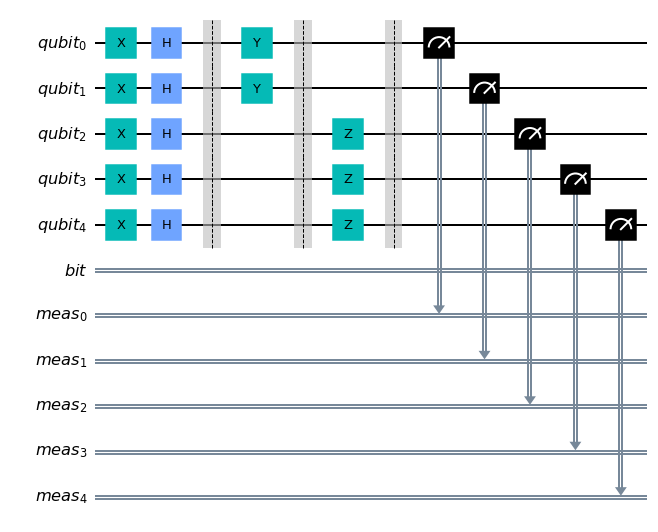

In [13]:
qc.draw('mpl',cregbundle=False)  # classsical bits will be seperate

## Visualization

In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

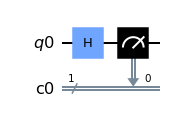

In [15]:
qc.h(q[0])
qc.measure(q[0],c[0])
qc.draw('mpl')

In [16]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)          

{'1': 516, '0': 508}


In [17]:
job2 = backend.run(qc_compiled,shots = 1024)
result2 = job2.result()
counts2 = result2.get_counts()
print(counts)

{'1': 516, '0': 508}


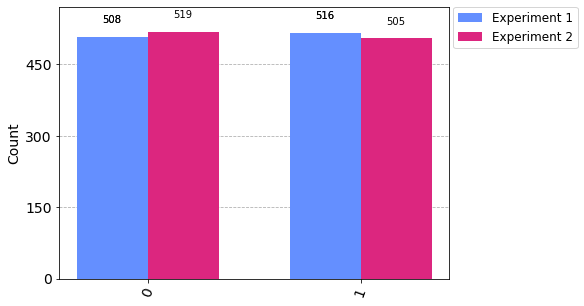

In [18]:
from qiskit.visualization import plot_histogram
plot_histogram([counts,counts2],legend=['Experiment 1','Experiment 2'])

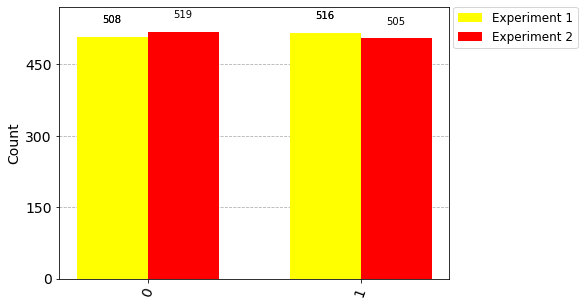

In [19]:
plot_histogram([counts,counts2],legend=['Experiment 1','Experiment 2'],color=['yellow','red'])

## Arbitrary Initialization

In [20]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc0 = QuantumCircuit(q,c)
qc1 = QuantumCircuit(q,c)

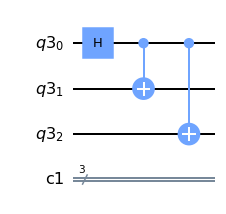

In [21]:
qc0.h(q[0])
qc0.cx(q[0],q[1])
qc0.cx(q[0],q[2])
qc0.draw('mpl')

In [22]:
from qiskit.quantum_info import Statevector

In [23]:
psi0 = Statevector(qc0)
psi0.draw('latex')

<IPython.core.display.Latex object>

In [24]:
from math import sqrt

In [25]:
ampl =[sqrt(2)/2,0,0,0,0,0,0,sqrt(2)/2] # 2^3 input the amplitude

In [26]:
qc1.initialize(ampl,[q[0],q[1],q[2]]) # define the qubit that you are going to use


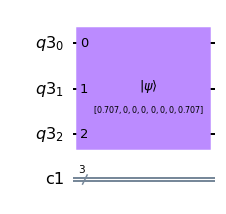

In [27]:
qc1.draw('mpl')


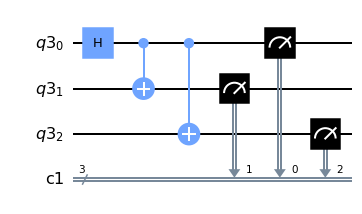

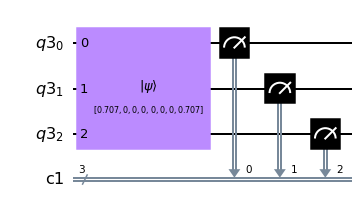

In [28]:
qc0.measure(q[0],c[0]) # measurement for qc 0 and 1 
qc0.measure(q[1],c[1])
qc0.measure(q[2],c[2])
qc1.measure(q[0],c[0])
qc1.measure(q[1],c[1])
qc1.measure(q[2],c[2])

display(qc0.draw('mpl'),qc1.draw('mpl'))


In [29]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_list = [qc0,qc1]
qc_compiled = transpile(qc_list,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

[{'111': 543, '000': 481}, {'000': 523, '111': 501}]


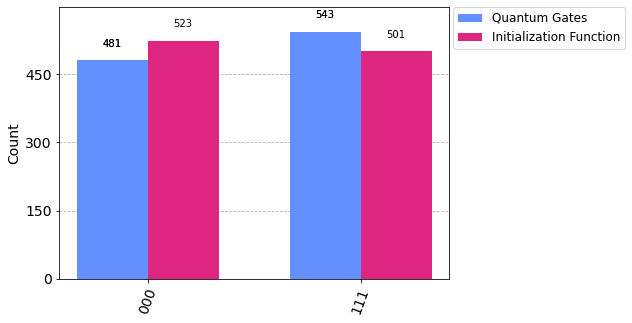

In [30]:
from qiskit.visualization import plot_histogram
plot_histogram(counts,legend=['Quantum Gates','Initialization Function'])

Then, Instead of using single qubit gates or multiple gates, we're going to construct our own quantum gate by defining an unitary matrix

In [31]:
from qiskit import QuantumCircuit, QuantumRegister
q = QuantumRegister(2)
qc = QuantumCircuit(q)

In [32]:
from qiskit.quantum_info import Statevector
psi1 = Statevector(qc) # both of thr qubits are initialized at state 0
psi1.draw('latex')

<IPython.core.display.Latex object>

Now, I want to define a quantum gate that operates on two qubits
as the identity gate.

In [33]:
from qiskit.quantum_info import Operator

In [34]:
id2 = Operator([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

In [35]:
qc.unitary(id2,[q[0],q[1]],label='Id2') # Define the quantum gate by using the unitary function,, I will apply the gate Id2 to the qubit O & 1 

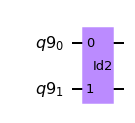

In [36]:
qc.draw('mpl')

In [37]:
psi2 = Statevector(qc)
psi2.draw('latex')

<IPython.core.display.Latex object>

### Inverse and transform Circuit to Gate

In [38]:
from qiskit import QuantumCircuit, QuantumRegister
q = QuantumRegister(5, name='qubit')
qc = QuantumCircuit(q) # no classical bit

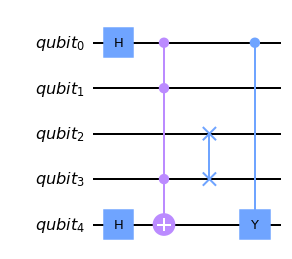

In [39]:
qc.h(q[0])
qc.h(q[4])
qc.mct([q[0],q[1],q[3]],q[4])
qc.swap(q[2],q[3])
qc.cy(q[0],q[4])
qc.draw('mpl')

In [40]:
inverse_circuit = qc.inverse() # 

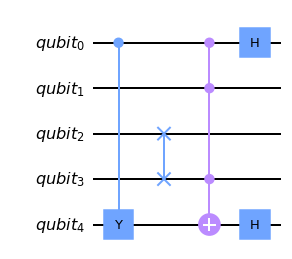

In [41]:
inverse_circuit.draw('mpl')

Let's then construct quantum gate with this particular circuit

In [42]:
my_gate = qc.to_gate() #, it converts the entire quantum circuit qc into a single gate. 

In [43]:
q = QuantumRegister(7,name='update_qubit') # to contruct a qc with 7 qubits
qc1 = QuantumCircuit(q)
# then I would love to apply the my_gate to qc1

In [44]:
qc1.append(my_gate,[q[1],q[2],q[3],q[4],q[5]]) # SO it has to be append so you will have the my_gate (7 qubit) then a list 5 defined qubits ( quantum gate)

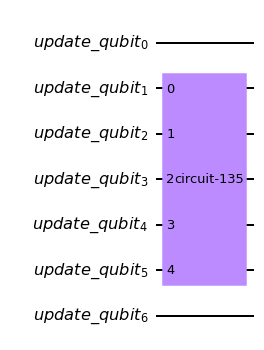

In [45]:
qc1.draw('mpl')

As you see we use the qubit[0,4] as a quantum gate qO and we implemented the particular gate (purple) on the quantum gate q1

## Circuit width and depth

In [49]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(2, name='qubits')
c = ClassicalRegister(2, name='bits')
qc = QuantumCircuit(q,c)

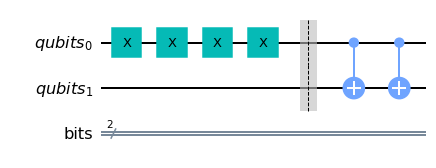

In [50]:
for i in range(4):
    qc.x(q[0])
qc.barrier()
for j in range(2):
    qc.cx(q[0],q[1])
qc.draw('mpl')

That is the qc. So first of all, let's talk about the depth, the depth of the state,
which is the longest path that has the length representing the number of gates that has to be executed

In [51]:
qc.depth()

6

In [52]:
q1 = QuantumRegister(3) # another example for the depth 
qc1 = QuantumCircuit(q1)


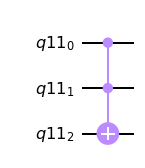

In [53]:
qc1.ccx(q1[0],q1[1],q1[2])
qc1.draw('mpl')

In [54]:
qc1.depth()

1

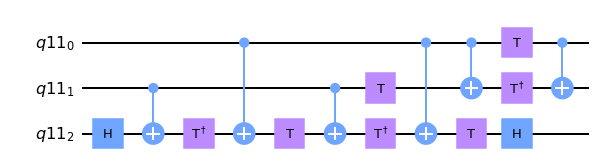

In [55]:
qc1.decompose().draw('mpl')

In [57]:
qc1.decompose().draw('text')

┌───┐      
q11_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                          │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q11_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├
       ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q11_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
       └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

In [58]:
qc.width()

4

In [59]:
qc1.width()

3